In [1]:
import json
import requests

import pandas as pd
from PIL import Image

In [2]:
def image_from_url(url):
    img = Image.open(requests.get(url, stream=True).raw)
    return img.resize((img.width // 10, img.height // 10))

In [3]:
df = pd.read_csv('../data/media.csv', usecols=['url', 'descriptionHebrew', 'descriptionEnglish', 'tags'])

In [4]:
empty_tag_placeholder = '{"tags": []}'

df.loc[df.tags == empty_tag_placeholder, 'tags'] = None

In [6]:
%%bash

cat ../data/kalos-media-tagging.sql | grep INSERT | wc -l | xargs echo "Number of rows in the table:"

Number of rows in the table: 4610


In [7]:
cond = df.loc[:, ['descriptionHebrew', 'descriptionEnglish', 'tags']].notnull().all(axis=1)

# drop rows with all field missing values
df = df.loc[cond]

print(f"Number of rows after dropping rows with all missing values: {df.shape[0]}")

Number of rows after dropping rows with all missing values: 2515


In [8]:
# make tags accessible
df.loc[:, 'tags'] = df.tags.apply(lambda x: set(json.loads(x)['tags']))

In [10]:
# remove extra whitespace
df.loc[:, 'descriptionHebrew'] = df.descriptionHebrew.str.replace(r'\s+', ' ', regex=True)
df.loc[:, 'descriptionEnglish'] = df.descriptionEnglish.str.replace(r'\s+', ' ', regex=True)

In [11]:
df.describe(include='object').T

,count,unique,top,freq
url,2515,2515,https://storage.googleapis.com/press-office-de...,1
descriptionHebrew,2515,1997,שלג בירושלים.,32
descriptionEnglish,2515,2047,Snow in Jerusalem.,32
tags,2515,2151,"{VIP, הטכניון, סיור, בנימין נתניהו, Prime Mini...",28


In [12]:
df.loc[:, ['descriptionEnglish', 'descriptionHebrew', 'tags']].sample(5)

,descriptionEnglish,descriptionHebrew,tags
2519,A YEMENITE HABANI WOMAN DOING HANDICRAFT.,אשה תימניה חבנית עוסקת במלאכת יד.,"{3.2, HABANIM, 3.18, PORTRAIT, FOLKLORE, IMMIG..."
1833,P.M. YITZHAK RABIN MEETING DURING A VISIT TO T...,"ראש הממשלה יצחק רבין נפגש עם נשיא ארה""ב ביל קל...","{ראש ממשלה, ביל קלינטון, וושינגטון, נשיא ארה""ב..."
282,"A PORTRAIT OF AVRAHAM BURG, THE CHAIRMAN OF TH...","פורטרט, יו""ר הסוכנות היהודית אברהם בורג. פירסו...","{פורטרט, VIP, אנשים, אברהם בורג, הסוכנות היהודית}"
3367,"SCHOOL CHILDREN LED BY THEIR TEACHER TO A ""TU ...","ט""ו בשבט. בצילום, ילדים משתתפים בטקס נטיעת עצי...","{PLANTING, TREE, JUDAISM, TU BISHVAT, 5.1, CHI..."
3276,MR. U KHIN MAUNG GALE OF BURMA WITH MESSRS A. ...,יו קין מאונג מבורמה מר לורי ומר שק בקבלת פנים ...,"{שיחה, בית הנשיא, שגריר, ראש השנה, 1.8, בורמה,..."


id: 3219
descriptionHebrew:
טקס השבעת נשיא המדינה התשיעי שמעון פרס במשכן הכנסת. בצילום, נשיא המדינה שמעון פרס ויו"ר הכנסת דליה איציק סוקרים משמר כבוד של חיילי צה"ל ברחבת הכנסת.
descriptionEnglish:
SWEARING IN CEREMONY OF ISRAEL'S 9TH PRESIDENT SHIMON PERES, AT THE KNESSET. IN PHOTO, INCOMING PRESIDENT PERES AND KNESSET SPEAKER DALIA ITZIK REVIEW AN HONOR GUARD.
tags:
{'דליה איציק', 'משמר כבוד', 'כנסת', 'שמעון פרס', 'נשק', 'יו"ר הכנסת', 'השבעה', 'חיילים', 'טקס', 'נשיא המדינה', 'הכתרה'}


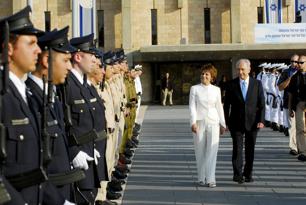

In [13]:
row = df.sample(1)
print('id:', row.index.values[0])
print('descriptionHebrew:')
print(row['descriptionHebrew'].values[0])
print('descriptionEnglish:')
print(row['descriptionEnglish'].values[0])
print('tags:')
print(row['tags'].values[0])

image_from_url(row['url'].values[0])

In [14]:
# save the cleaned data
df.to_parquet('../data/media_cleaned.pqt')

In [16]:
%%bash
ls -lh ../data/

total 13M
-rwxrwxrwx 1 noyk noyk 2.9M Jun 28 10:43 kalos-media-tagging-fixed.sql
-rwxrwxrwx 1 noyk noyk 2.9M Jun 28 10:43 kalos-media-tagging.sql
-rwxrwxrwx 1 noyk noyk 2.5M Jun 28 20:48 media.csv
-rwxrwxrwx 1 noyk noyk 481K Jun 29 16:25 media_cleaned.pqt
-rwxrwxrwx 1 noyk noyk 3.7M Jun 29 13:57 media_hebrew_embeddings.pt
